In [13]:
import pandas as pd
#trees = pd.read_csv("tree.csv")
tree_data = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da", index_col="id", low_memory=False)

In [14]:
tree_data.head(10)

address_number         street               common_name  \
id                                                                   
754166088            7428  MONTICELLO ST                     Stump   
1946899269            220     BALVER AVE        Linden: Littleleaf   
1431517397           2822      SIDNEY ST                Maple: Red   
994063598             608     SUISMON ST            Maple: Freeman   
1591838573           1135   N NEGLEY AVE             Maple: Norway   
1333224197           5550      BRYANT ST                  Oak: Pin   
239290336            5503      BRYANT ST  Dogwood: Corneliancherry   
1233652274           1207       KING AVE             Maple: Norway   
1477030894           1201       KING AVE             Maple: Norway   
1484901843           1456    WOODBINE ST             Maple: Norway   

              scientific_name  height  width  growth_space_length  \
id                                                                  
754166088               Stump     0.0    0.0                 10.0   
1946899269      Tilia cordata     0.0    0.0                 99.0   
1431517397        Acer rubrum    22.0    6.0                  6.0   
994063598    Acer x freemanii    25.0   10.0                  3.0   
1591838573   Acer platanoides    52.0   13.0                 99.0   
1333224197  Quercus palustris    45.0   18.0                 35.0   
239290336          Cornus mas     8.0    4.0                 99.0   
1233652274   Acer platanoides    27.0   10.0                 30.0   
1477030894   Acer platanoides    35.0   12.0                  3.0   
1484901843   Acer platanoides     NaN    NaN                  NaN   

            growth_space_width     growth_space_type  diameter_base_height  \
id                                                                           
754166088                  2.0           Well or Pit                  16.0   
1946899269                99.0  Open or Unrestricted                  22.0   
1431517397                 3.0           Well or Pit                   6.0   
994063598                  3.0           Well or Pit                   7.0   
1591838573                99.0  Open or Unrestricted                  38.0   
1333224197                 3.0  Tree Lawn or Parkway                  21.0   
239290336                  3.0  Tree Lawn or Parkway                   2.0   
1233652274                 3.0  Tree Lawn or Parkway                  13.0   
1477030894                 3.0           Well or Pit                  18.0   
1484901843                 NaN  Open or Unrestricted                   NaN   

            ...      neighborhood council_district  ward         tract  \
id          ...                                                          
754166088   ...    Homewood North              9.0  13.0  4.200313e+10   
1946899269  ...           Oakwood              2.0  28.0  4.200356e+10   
1431517397  ...  South Side Flats              3.0  16.0  4.200316e+10   
994063598   ...    East Allegheny              1.0  23.0  4.200356e+10   
1591838573  ...     Highland Park              7.0  11.0  4.200311e+10   
1333224197  ...     Highland Park              7.0  11.0  4.200311e+10   
239290336   ...     Highland Park              7.0  11.0  4.200311e+10   
1233652274  ...     Highland Park              7.0  11.0  4.200311e+10   
1477030894  ...     Highland Park              7.0  11.0  4.200311e+10   
1484901843  ...   Stanton Heights              7.0  10.0  4.200310e+10   

            public_works_division  pli_division  police_zone  fire_zone  \
id                                                                        
754166088                     2.0          13.0          5.0       3-17   
1946899269                    5.0          28.0          6.0       1-19   
1431517397                    3.0          16.0          3.0       4-24   
994063598                     1.0          23.0          1.0        1-6   
1591838573                    2.0          11.0          5.0     

In [15]:
count_dict = {}
for index, row in tree_data.iterrows():
    key = row['neighborhood']
    if key in count_dict:
        count_dict[key] += 1
    else: count_dict[key] = 1
        
rankings = list(count_dict.items())
rankings.sort(key = lambda x:x[1], reverse = True)
print(rankings)

[('Squirrel Hill South', 5073), ('Highland Park', 2941), ('Squirrel Hill North', 2083), ('South Side Flats', 1693), ('Shadyside', 1558), ('Bloomfield', 1436), ('East Liberty', 1366), ('Point Breeze', 1316), ('Perry North', 1007), ('Central Business District', 1002), ('Brighton Heights', 910), ('Mount Washington', 874), ('Allegheny Center', 867), ('Brookline', 853), ('North Oakland', 775), ('Carrick', 772), ('Greenfield', 745), ('Central Lawrenceville', 713), ('Manchester', 707), ('Stanton Heights', 700), ('Central Northside', 674), ('Hazelwood', 652), ('Garfield', 626), ('Beechview', 611), ('Crawford-Roberts', 568), ('Point Breeze North', 566), ('Lincoln-Lemington-Belmar', 525), ('Lower Lawrenceville', 508), ('Marshall-Shadeland', 488), ('Strip District', 486), ('East Hills', 483), ('Morningside', 461), ('Homewood South', 459), ('North Shore', 457), ('Banksville', 437), ('Regent Square', 434), ('Knoxville', 432), ('Homewood North', 403), ('Sheraden', 392), ('East Allegheny', 391), ('Al

In [16]:
print("TOP 10:")
for item in rankings[0:10]:
    print(item)

TOP 10:
('Squirrel Hill South', 5073)
('Highland Park', 2941)
('Squirrel Hill North', 2083)
('South Side Flats', 1693)
('Shadyside', 1558)
('Bloomfield', 1436)
('East Liberty', 1366)
('Point Breeze', 1316)
('Perry North', 1007)
('Central Business District', 1002)


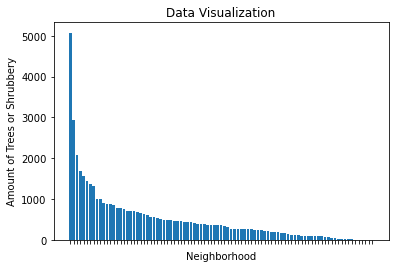

In [22]:
import matplotlib.pyplot as plt

data = [x[1] for x in rankings]
labels = []
#labels = [x[0] for x in rankings]
plt.xticks(range(len(data)), labels)
plt.xlabel('Neighborhood')
plt.ylabel('Amount of Trees or Shrubbery')
plt.title('Data Visualization')
plt.bar(range(len(data)), data) 
plt.show()

Looking more closely at the top ten:

In [64]:
data = [rankings[i][1] for i in range(0, len(rankings[0:10]))]
for x in rankings[0:10]:
    name = x[0].split(" ")
    print(name)
    j = ""
    for firstletter in name:
        j += firstletter[0:3] + ". "

    labels.append(j)
#labels = [''.join(x[0].split(" ")) for x in rankings[0:10]]
plt.xticks(range(len(data)), labels)
plt.xlabel('Neighborhood')
plt.ylabel('Amount of Trees or Shrubbery')
plt.title('Data Visualization')
plt.bar(range(len(data)), data, width = 0.1, color = 'r') 
width = 0.8
plt.show()
print(labels)


['Squirrel', 'Hill', 'South']
Squ. Hil. Sou. 
['Highland', 'Park']
Hig. Par. 
['Squirrel', 'Hill', 'North']
Squ. Hil. Nor. 
['South', 'Side', 'Flats']
Sou. Sid. Fla. 
['Shadyside']
Sha. 
['Bloomfield']
Blo. 
['East', 'Liberty']
Eas. Lib. 
['Point', 'Breeze']
Poi. Bre. 
['Perry', 'North']
Per. Nor. 
['Central', 'Business', 'District']
Cen. Bus. Dis. 


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (90).